In [1]:
train_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

test_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

In [2]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(train_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_train_data.csv", index=False)

final_df = pd.DataFrame()
for url in tqdm(test_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_test_data.csv", index=False)

del final_df

100%|██████████| 2/2 [01:08<00:00, 34.22s/it]


In [3]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_train_data.csv')
test_data = pd.read_csv('/content/ctu_13_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [2]:
# df['SrcAddr'] = np.random.permutation(df['SrcAddr'])
# df['Sport'] = np.random.permutation(df['Sport'])

# Function to randomize IP address
# def randomize_ip():
#     return f"{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}"

# # Function to randomize port
# def randomize_port():
#     return np.random.randint(1024, 65536)  # Registered and dynamic ports

# # Apply randomization
# data['SrcAddr'] = data['SrcAddr'].apply(lambda x: randomize_ip())
# data['Sport'] = data['Sport'].apply(lambda x: randomize_port())

In [3]:
data.shape

(4632758, 15)

In [4]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [5]:
data['Label'].unique()

array(['flow=Background-UDP-Established', 'flow=Background',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=Background-TCP-Established',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-Attempt',
       'flow=From-Normal-V42-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-NTP-Established-1',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics3',
       'flow=Background-Attempt-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy',
       'flow=Background-google-analytics2',
       'flow=Background-google-analytics6', 'flow=From-Normal-V42-Jist',
       'flow=Background-google-webmail', 'flow=Background-TCP-Attempt',
       'flow=Background-google-analytics12',
       'flow=Background-google-analytics1',
       'flow=Background-google-analytics13',
       'flow=Background-google-analytics14', 'flow=To-Background-Jist',
       'flow=Background-ajax.google', 'flow=From-Nor

In [6]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 2
    elif 'background' in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))
test_data['Label'] = test_data['Label'].apply(lambda x:convertlabel(x))

In [7]:
data['Label'].value_counts()

,count
Label,
1,4531349
2,61902
0,39507


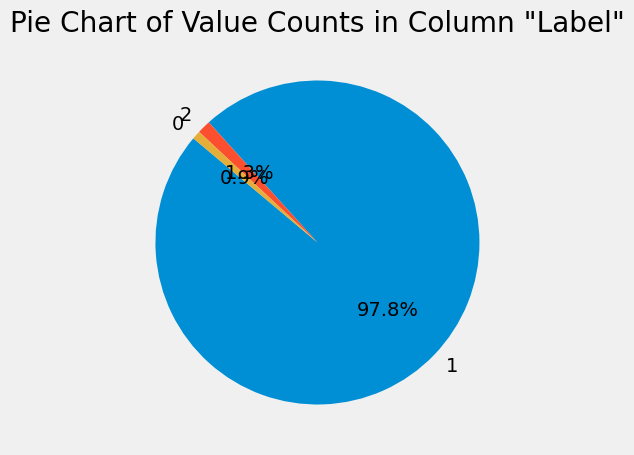

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [9]:
th = 1000
data1 = data[data['Label'] == 0].head(th)
data2 = data[data['Label'] == 1].head(th)
data3 = data[data['Label'] == 2].head(th)

data = pd.concat([data1,data2,data3])

th = 1000
data1 = test_data[test_data['Label'] == 0].head(th)
data2 = test_data[test_data['Label'] == 1].head(th)
data3 = test_data[test_data['Label'] == 2].head(th)

test_data = pd.concat([data1,data2,data3])

test_data.shape

(3000, 15)

In [10]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000
2,1000


In [11]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)
test_data.to_csv('/content/ctu_13_sample_test_data.csv', index=False)

In [12]:
data = pd.read_csv('/content/ctu_13_sample_data.csv')
test_data = pd.read_csv('/content/ctu_13_sample_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


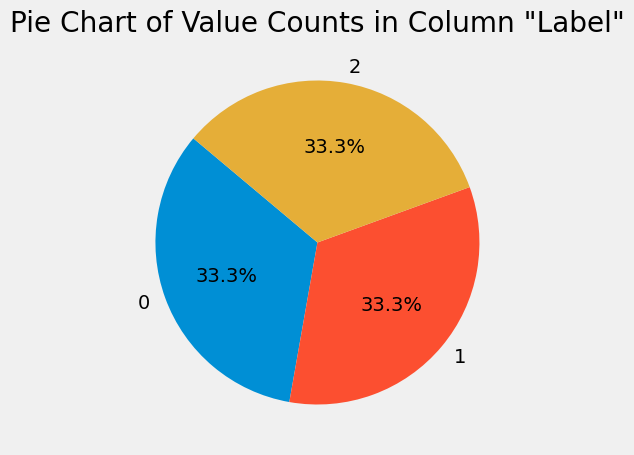

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [14]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [15]:
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.133333
Dir,0.000000
DstAddr,0.000000
Dport,0.133333
State,0.000000
sTos,0.100000


In [16]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


In [17]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])

test_data = test_data[pd.to_numeric(test_data['Sport'], errors='coerce').notnull()]
test_data['Sport'] = pd.to_numeric(test_data['Sport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [18]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])

test_data = test_data[pd.to_numeric(test_data['Dport'], errors='coerce').notnull()]
test_data['Dport'] = pd.to_numeric(test_data['Dport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [19]:
test_data = test_data.fillna(value=0.0)
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [20]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,2977.000000,2977.000000,2977.000000,2977.0,2977.0,2977.000000,2.977000e+03,2.977000e+03,2977.000000
mean,453.830185,26762.274437,5238.795768,0.0,0.0,188.256634,1.336155e+05,1.223028e+05,1.000336
std,1083.531994,22960.660812,12049.638971,0.0,0.0,3608.815860,3.202968e+06,3.120164e+06,0.819577
min,0.000000,1.000000,20.000000,0.0,0.0,1.000000,6.000000e+01,6.000000e+01,0.000000
25%,0.000403,1782.000000,53.000000,0.0,0.0,2.000000,1.900000e+02,7.500000e+01,0.000000
50%,0.404371,33107.000000,80.000000,0.0,0.0,3.000000,2.830000e+02,1.860000e+02,1.000000
75%,9.033020,49289.000000,6601.000000,0.0,0.0,10.000000,1.129000e+03,4.570000e+02,2.000000
max,3599.995117,65282.000000,65520.000000,0.0,0.0,162760.000000,1.371365e+08,1.328164e+08,2.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  2977 non-null   object 
 1   Dur        2977 non-null   float64
 2   Proto      2977 non-null   object 
 3   SrcAddr    2977 non-null   object 
 4   Sport      2977 non-null   int64  
 5   Dir        2977 non-null   object 
 6   DstAddr    2977 non-null   object 
 7   Dport      2977 non-null   int64  
 8   State      2977 non-null   object 
 9   sTos       2977 non-null   float64
 10  dTos       2977 non-null   float64
 11  TotPkts    2977 non-null   int64  
 12  TotBytes   2977 non-null   int64  
 13  SrcBytes   2977 non-null   int64  
 14  Label      2977 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 372.1+ KB


In [22]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,0.0,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,0.0,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,0.0,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


In [23]:
data['Proto'].value_counts()

,count
Proto,
tcp,1507
udp,1464
rtp,5
rtcp,1


In [24]:
data['Dir'].value_counts()

,count
Dir,
<->,1404
->,1332
<?>,221
?>,20


In [25]:
data['State'].value_counts()

,count
State,
CON,1404
S_,619
FSPA_FSPA,356
PA_PA,95
FSA_FSA,86
...,...
PA_PAC,1
PA_FPA,1
FRPA_RA,1


In [26]:
data.isna().sum().sum()

0

In [27]:
data.duplicated().sum()

0

In [28]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

test_data['StartTime'] = pd.to_datetime(test_data['StartTime'])
test_data['Hour'] = test_data['StartTime'].dt.hour
test_data['Minute'] = test_data['StartTime'].dt.minute
test_data['Second'] = test_data['StartTime'].dt.second
test_data['DayOfWeek'] = test_data['StartTime'].dt.dayofweek
test_data['Day'] = test_data['StartTime'].dt.day

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  2977 non-null   datetime64[ns]
 1   Dur        2977 non-null   float64       
 2   Proto      2977 non-null   object        
 3   SrcAddr    2977 non-null   object        
 4   Sport      2977 non-null   int64         
 5   Dir        2977 non-null   object        
 6   DstAddr    2977 non-null   object        
 7   Dport      2977 non-null   int64         
 8   State      2977 non-null   object        
 9   sTos       2977 non-null   float64       
 10  dTos       2977 non-null   float64       
 11  TotPkts    2977 non-null   int64         
 12  TotBytes   2977 non-null   int64         
 13  SrcBytes   2977 non-null   int64         
 14  Label      2977 non-null   int64         
 15  Hour       2977 non-null   int32         
 16  Minute     2977 non-null   int32         
 17  

In [30]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

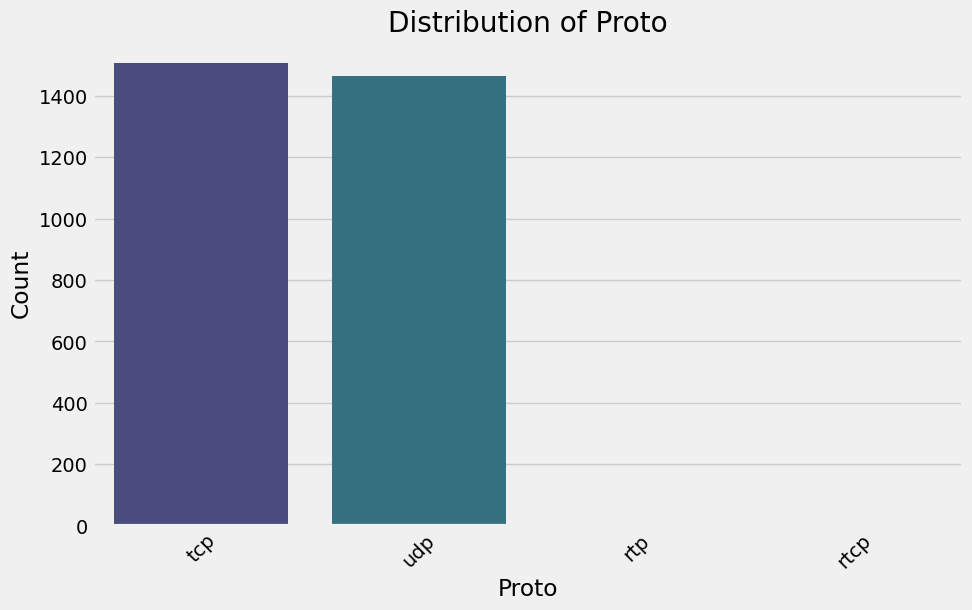

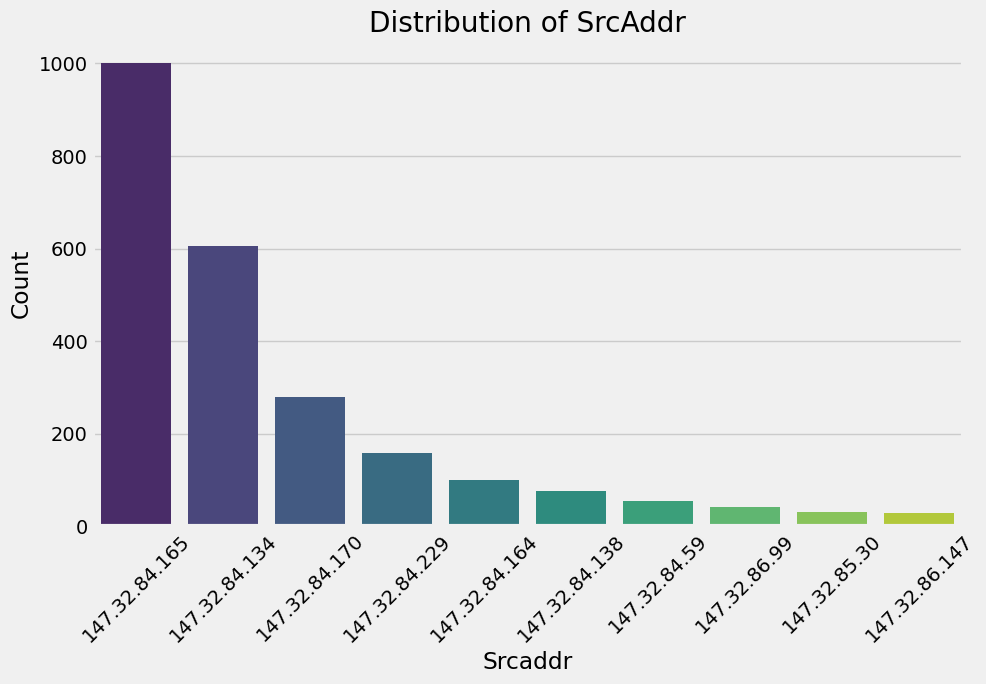

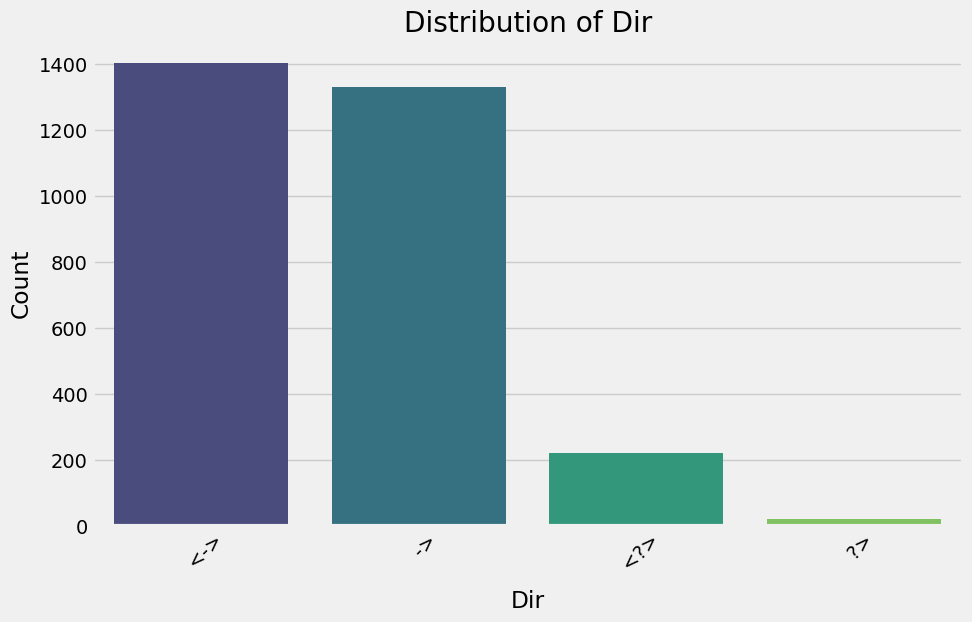

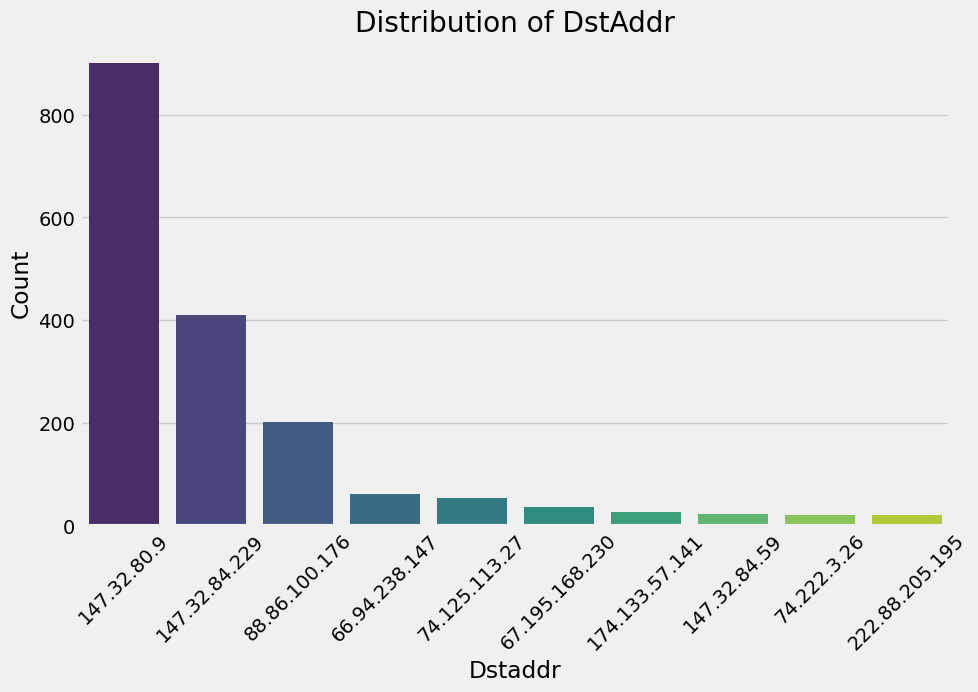

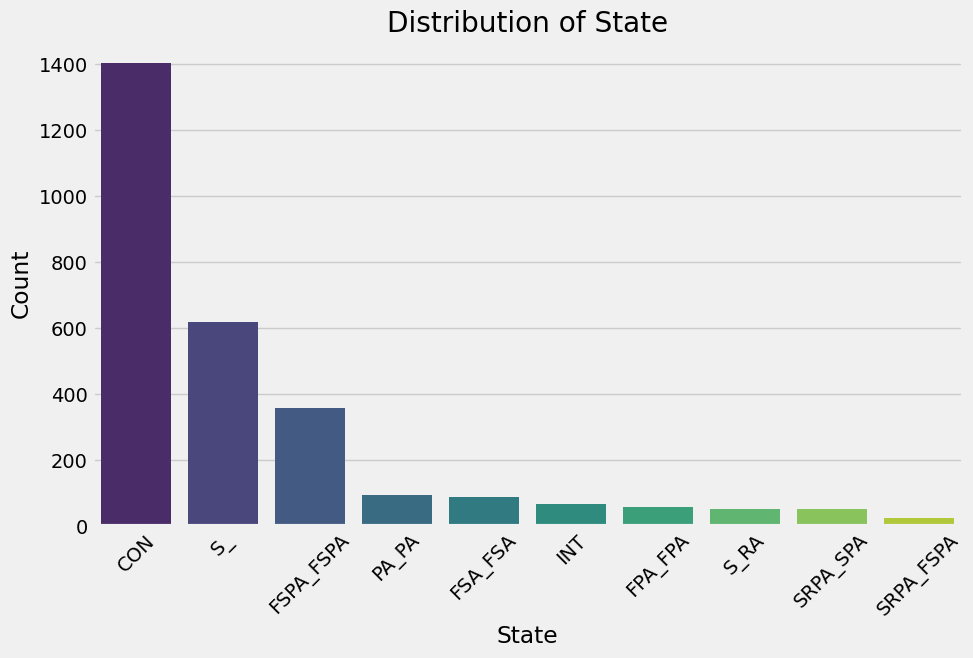

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

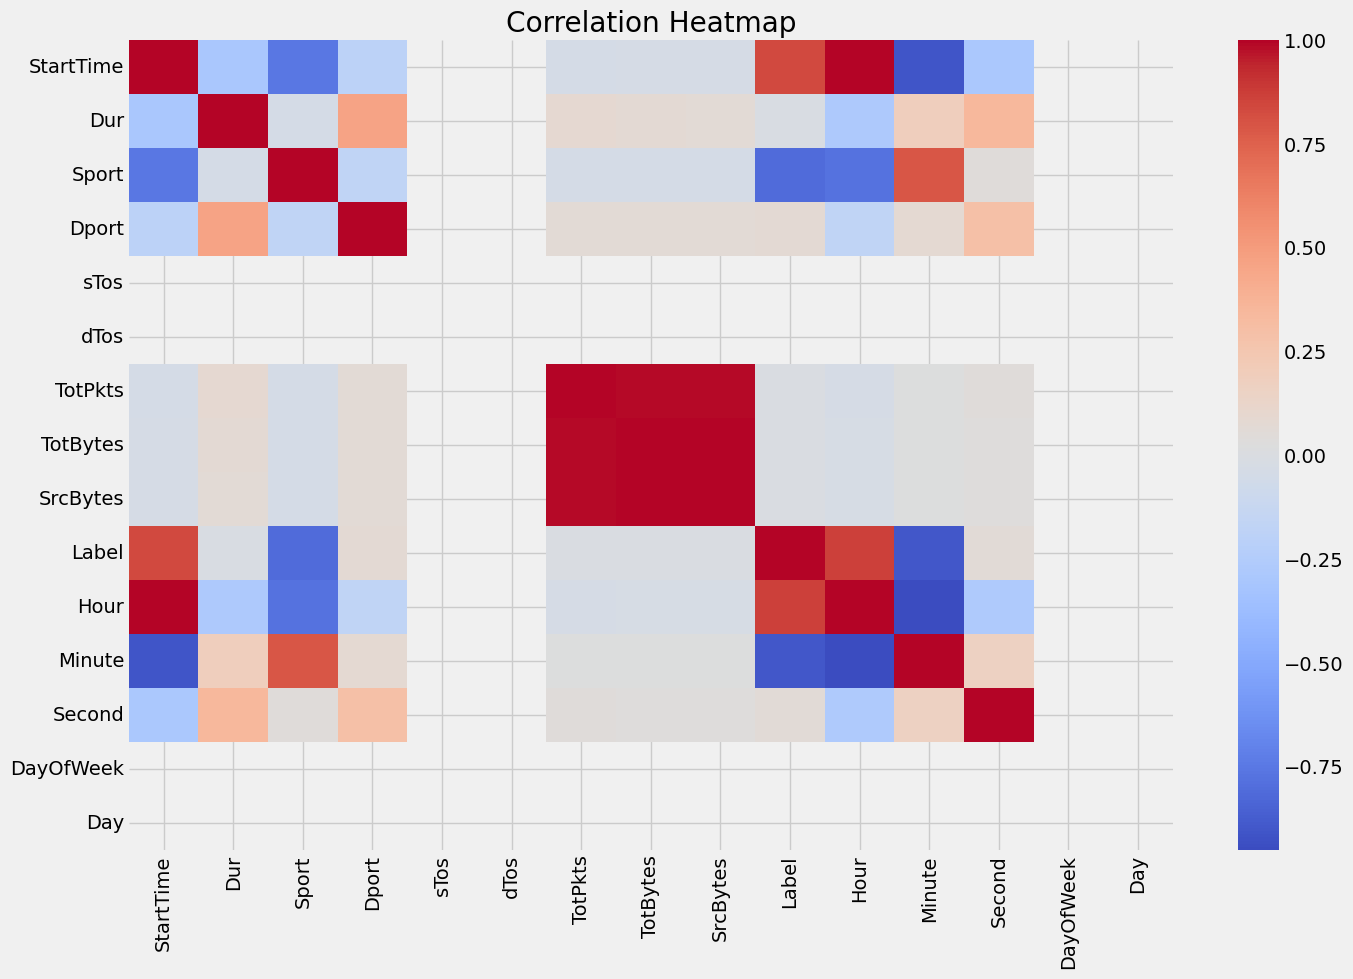

In [32]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Dport,0.459872
Second,0.350342
Minute,0.187611
TotPkts,0.091555
TotBytes,0.071425
SrcBytes,0.068174
Label,-0.006575
Sport,-0.042020
Hour,-0.278567


In [34]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.302288,-0.758454,-0.195426,NaN,NaN,-0.036770,-0.030991,-0.029962,0.837608,0.994256,-0.912745,-0.295197,NaN,NaN
Dur,-0.302288,1.000000,-0.042020,0.459872,NaN,NaN,0.091555,0.071425,0.068174,-0.006575,-0.278567,0.187611,0.350342,NaN,NaN
Sport,-0.758454,-0.042020,1.000000,-0.173657,NaN,NaN,-0.039616,-0.040581,-0.040822,-0.811758,-0.778441,0.787759,0.045250,NaN,NaN
Dport,-0.195426,0.459872,-0.173657,1.000000,NaN,NaN,0.066875,0.062880,0.062798,0.071214,-0.170593,0.084048,0.295801,NaN,NaN
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.036770,0.091555,-0.039616,0.066875,NaN,NaN,1.000000,0.988008,0.985851,0.000909,-0.033749,0.022348,0.041299,NaN,NaN
TotBytes,-0.030991,0.071425,-0.040581,0.062880,NaN,NaN,0.988008,1.000000,0.999703,0.000455,-0.028563,0.019285,0.034662,NaN,NaN
SrcBytes,-0.029962,0.068174,-0.040822,0.062798,NaN,NaN,0.985851,0.999703,1.000000,0.000045,-0.027660,0.018826,0.032958,NaN,NaN
Label,0.837608,-0.006575,-0.811758,0.071214,NaN,NaN,0.000909,0.000455,0.000045,1.000000,0.867629,-0.902161,0.056914,NaN,NaN


In [35]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos', 'DayOfWeek', 'Day']

In [36]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,2977


In [37]:
data = data.drop(columns=constant_columns)
test_data = test_data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,141,141,0,9,46,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,247,247,0,9,46,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,173,173,0,9,46,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,207,72,0,9,46,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,247,72,0,9,46,54


In [38]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Label', 'Hour', 'Minute']

In [39]:
if 'Label' in high_corr_features:
    high_corr_features.remove('Label')
high_corr_features

['TotBytes', 'SrcBytes', 'Hour', 'Minute']

In [40]:
data = data.drop(columns=high_corr_features)
test_data = test_data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,0,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,0,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,0,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,0,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,0,54


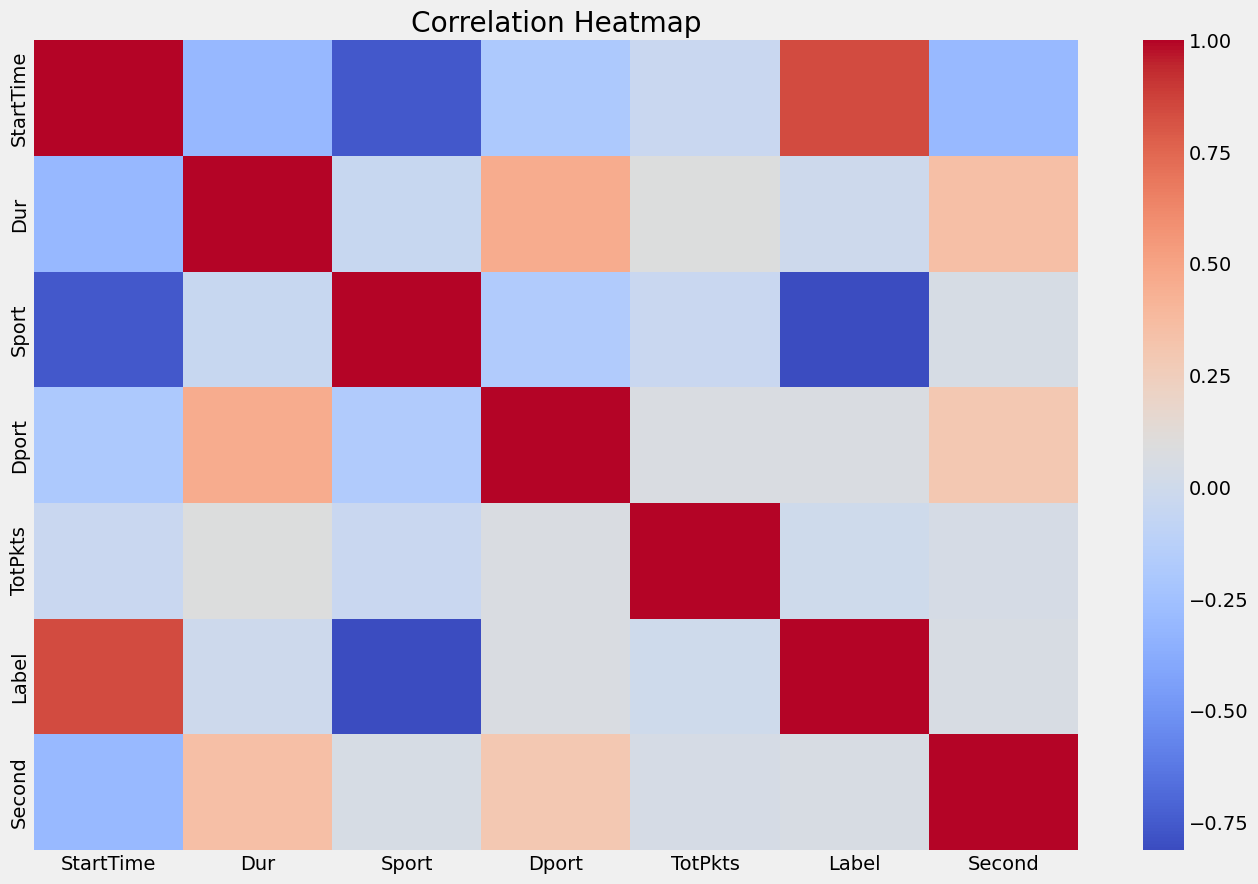

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,0,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,0,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,0,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,0,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,0,54


In [43]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Second'],
      dtype='object')

In [44]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

# Convert Source and Destination IP addresses to numerical values using hashing
test_data['SrcAddr'] = test_data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
test_data['DstAddr'] = test_data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
test_data['SrcAddr'] = test_data['SrcAddr'].fillna(-1).astype(int)
test_data['DstAddr'] = test_data['DstAddr'].fillna(-1).astype(int)

In [45]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [46]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

test_data = test_data.drop(columns=['StartTime'])
test_data = test_data.drop(columns=['SrcAddr','Sport'])

In [47]:
X = data.drop(columns=['Label'])
y = data[['Label']]

X_test = test_data.drop(columns=['Label'])
y_test = test_data[['Label']]

In [48]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,udp,->,18682,54230,INT,1,53
1,0.000000,udp,->,18682,58314,INT,1,54
2,0.000000,udp,->,18682,54823,INT,1,54
3,0.000291,udp,<->,22012,53,CON,2,54
4,0.000321,udp,<->,22012,53,CON,2,54


In [49]:
categorical_cols = ['Proto', 'State', 'Dir']

In [50]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X_test[categorical_cols] = le.transform(X_test[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,3.0,0.0,18682,54230,30.0,1,53
1,0.000000,3.0,0.0,18682,58314,30.0,1,54
2,0.000000,3.0,0.0,18682,54823,30.0,1,54
3,0.000291,3.0,2.0,22012,53,1.0,2,54
4,0.000321,3.0,2.0,22012,53,1.0,2,54


In [51]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [52]:
processed_data = pd.concat([X_test,y_test],axis=1)
# test_processed_data = pd.concat([X_test,y_test],axis=1)
processed_data.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second,Label
0,0.000000,3.0,0.0,18682,54230,30.0,1,53,0
1,0.000000,3.0,0.0,18682,58314,30.0,1,54,0
2,0.000000,3.0,0.0,18682,54823,30.0,1,54,0
3,0.000291,3.0,2.0,22012,53,1.0,2,54,0
4,0.000321,3.0,2.0,22012,53,1.0,2,54,0


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_data = scaler.fit_transform(processed_data)
# test_processed_data = scaler.transform(test_processed_data)

In [54]:
processed_data

array([[-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.84412436, -1.22075613],
       [-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.89765306, -1.22075613],
       [-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.89765306, -1.22075613],
       ...,
       [-0.41119825, -0.96869519, -1.07670303, ..., -0.05134309,
        -0.44056438,  1.21993629],
       [-0.41558161, -0.96869519, -1.07670303, ..., -0.04968022,
        -0.44056438,  1.21993629],
       [-0.41094122, -0.96869519, -1.07670303, ..., -0.05134309,
        -0.44056438,  1.21993629]])

In [55]:
processed_data.shape

(2977, 9)

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

latent_dim = 32  # Dimension of noise vector
clip_value = 0.01  # Weight clipping parameter

# Custom Wasserstein loss
def wasserstein_loss(y_true, y_pred):
    return tf.keras.backend.mean(y_true * y_pred)

# Generator remains similar
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        # Output dimension matches processed_data; using sigmoid assuming data is scaled [0,1]
        layers.Dense(processed_data.shape[1], activation='sigmoid')
    ])
    return model

# Critic (formerly Discriminator) with linear output
def build_critic():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=processed_data.shape[1]),
        layers.Dense(64, activation='relu'),
        # No activation here (linear output) for Wasserstein loss
        layers.Dense(1)
    ])
    return model

# Initialize models
generator = build_generator()
critic = build_critic()

In [57]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,593 (45.29 KB)

 Trainable params: 11,593 (45.29 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
critic.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

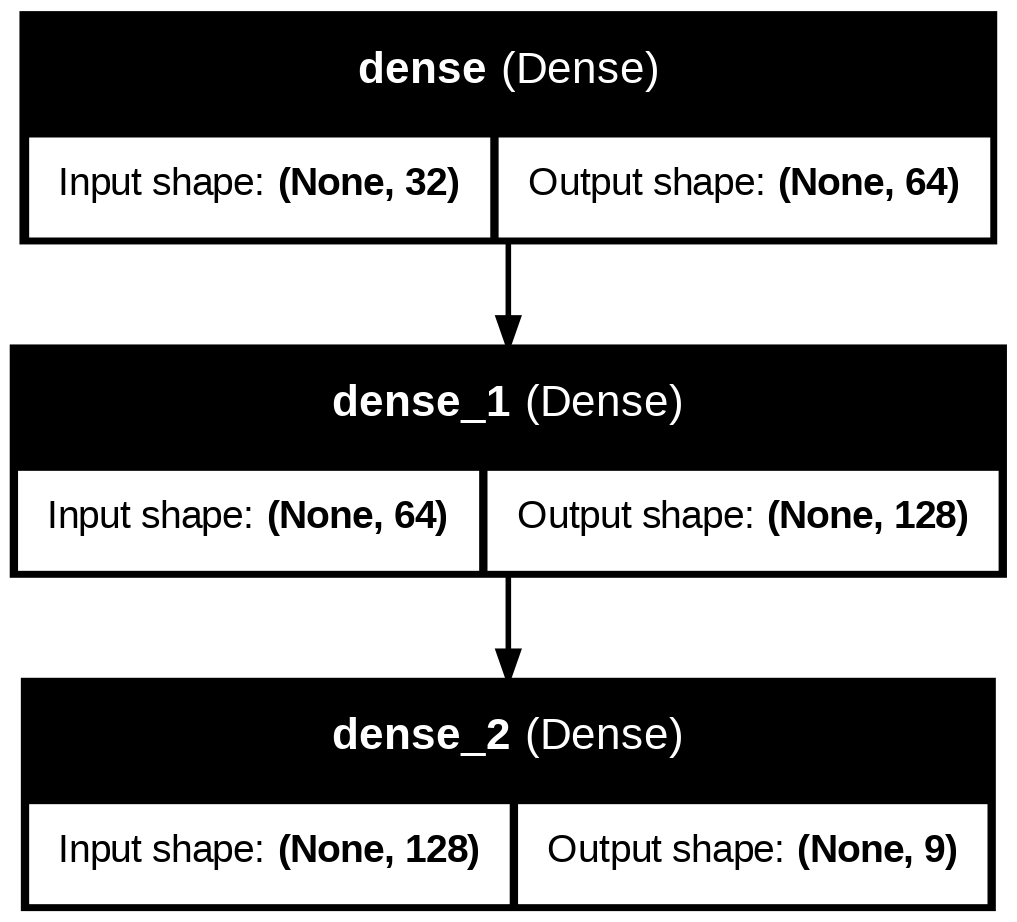

In [59]:
from tensorflow.keras.utils import plot_model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

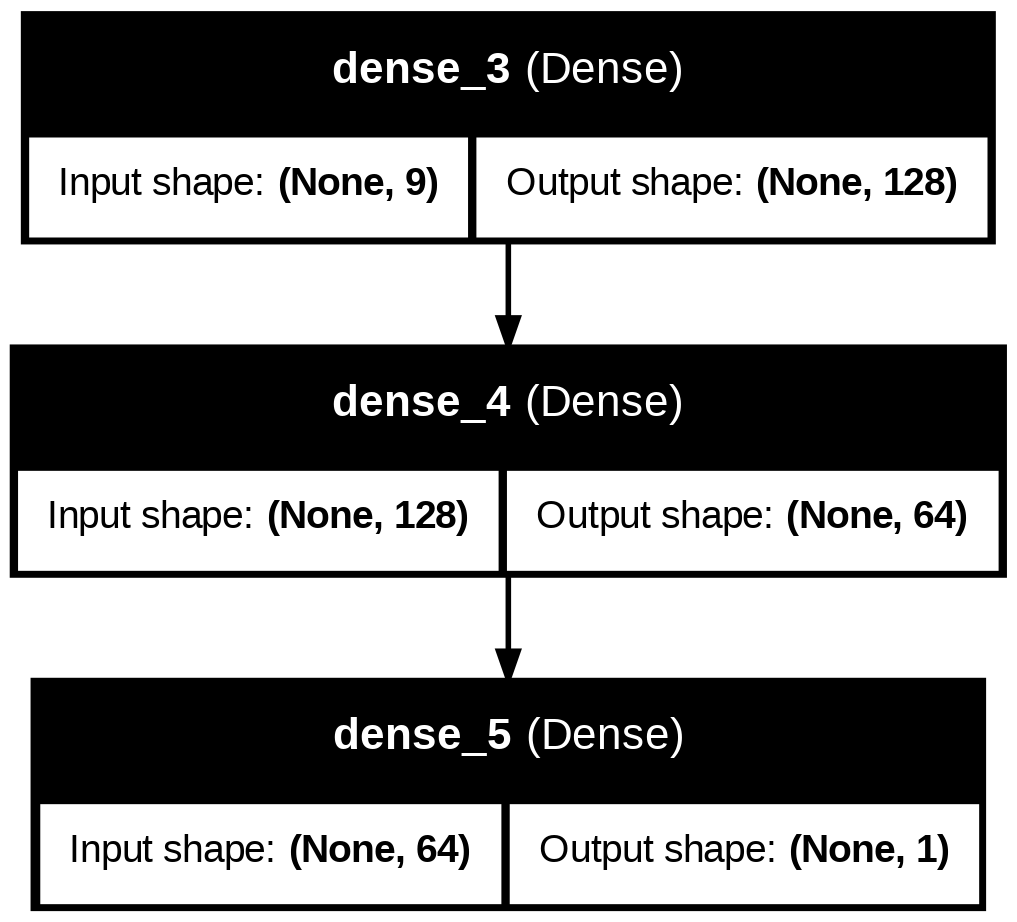

In [60]:
plot_model(critic, to_file='critic_plot.png', show_shapes=True, show_layer_names=True)

In [61]:
# Compile the critic using the Wasserstein loss and RMSprop optimizer
critic.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
                 loss=wasserstein_loss)

# Build the combined GAN model (Generator + Critic)
# Freeze the critic when training the generator
critic.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = critic(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
            loss=wasserstein_loss)

In [62]:
# Training parameters
epochs = 10
batch_size = 32

In [63]:
# Dictionary to store metrics
metrics = {
    "epoch": [],
    "critic_loss": [],
    "g_loss": []
}

# Training loop with tqdm for progress bar
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    # ---------------------
    #  Train the Critic
    # ---------------------
    # Sample a random batch of real data
    idx = np.random.randint(0, processed_data.shape[0], batch_size)
    real_data = processed_data[idx]

    # Generate a batch of fake data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    # For WGAN, label real data as -1 and fake data as 1
    real_labels = -np.ones((batch_size, 1))
    fake_labels = np.ones((batch_size, 1))

    # Train on real and fake data
    critic_loss_real = critic.train_on_batch(real_data, real_labels)
    critic_loss_fake = critic.train_on_batch(fake_data, fake_labels)
    critic_loss = 0.5 * (critic_loss_real + critic_loss_fake)

    # Weight clipping for the critic
    for layer in critic.layers:
        weights = layer.get_weights()
        weights = [np.clip(w, -clip_value, clip_value) for w in weights]
        layer.set_weights(weights)

    # ---------------------
    #  Train the Generator
    # ---------------------
    # Generator training: the generator tries to get the critic to output -1 on fake data.
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = -np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Save metrics
    metrics["epoch"].append(epoch)
    metrics["critic_loss"].append(critic_loss)
    metrics["g_loss"].append(g_loss)

    # Optionally print progress
    print(f"Epoch {epoch} - Critic Loss: {critic_loss:.4f}, Generator Loss: {g_loss:.4f}")

Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Training Progress:  10%|█         | 1/10 [00:00<00:08,  1.00it/s]

Epoch 1 - Critic Loss: -0.0109, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 2 - Critic Loss: 0.0011, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training Progress:  30%|███       | 3/10 [00:01<00:02,  3.13it/s]

Epoch 3 - Critic Loss: 0.0007, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Epoch 4 - Critic Loss: 0.0005, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training Progress:  50%|█████     | 5/10 [00:01<00:01,  5.00it/s]

Epoch 5 - Critic Loss: 0.0004, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 6 - Critic Loss: 0.0003, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Training Progress:  70%|███████   | 7/10 [00:01<00:00,  6.63it/s]

Epoch 7 - Critic Loss: 0.0003, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Epoch 8 - Critic Loss: 0.0003, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training Progress:  90%|█████████ | 9/10 [00:01<00:00,  7.78it/s]

Epoch 9 - Critic Loss: 0.0002, Generator Loss: -0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training Progress: 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

Epoch 10 - Critic Loss: 0.0002, Generator Loss: -0.0000


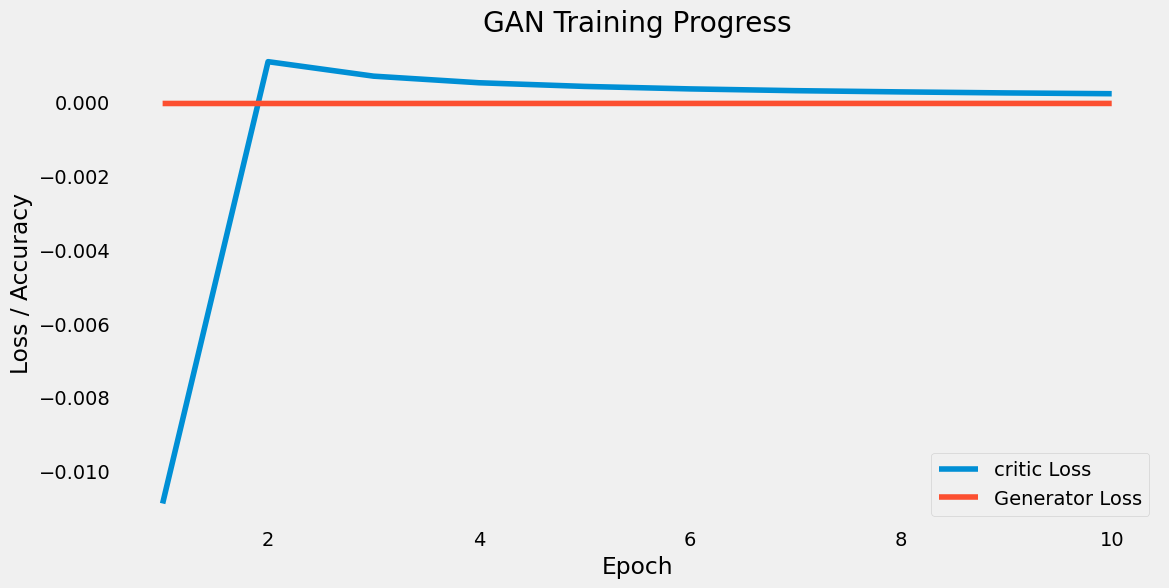

In [64]:
# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(metrics["epoch"], metrics["critic_loss"], label="critic Loss")
plt.plot(metrics["epoch"], metrics["g_loss"], label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.title("GAN Training Progress")
plt.legend()
plt.grid()
plt.show()

In [65]:
noise = np.random.normal(0, 1, (processed_data.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = processed_data
synthetic_data = scaler.inverse_transform(synthetic_data)
synthetic_data[:,-1] = y.values.ravel()
print("Synthetic Data:")
print(synthetic_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Synthetic Data:
[[0.00000000e+00 3.00000000e+00 2.22044605e-16 ... 1.00000000e+00
  5.30000000e+01 0.00000000e+00]
 [0.00000000e+00 3.00000000e+00 2.22044605e-16 ... 1.00000000e+00
  5.40000000e+01 0.00000000e+00]
 [0.00000000e+00 3.00000000e+00 2.22044605e-16 ... 1.00000000e+00
  5.40000000e+01 0.00000000e+00]
 ...
 [8.35856300e+00 2.00000000e+00 2.22044605e-16 ... 3.00000000e+00
  2.90000000e+01 2.00000000e+00]
 [3.60984800e+00 2.00000000e+00 2.22044605e-16 ... 9.00000000e+00
  2.90000000e+01 2.00000000e+00]
 [8.63701500e+00 2.00000000e+00 2.22044605e-16 ... 3.00000000e+00
  2.90000000e+01 2.00000000e+00]]


In [66]:
synthetic_data.shape

(2977, 9)

In [75]:
X_test = synthetic_data[:,:-1]
y_test = synthetic_data[:,-1]

X_train = X.copy()
y_train = y.copy()

# X_test = test_processed_data[:,:-1]
# y_test = test_processed_data[:,-1]

In [76]:
np.unique(y_train)

array([0, 1, 2])

In [77]:
np.unique(y_test)

array([0., 1., 2.])

In [78]:
X_train.shape,X_test.shape

((2977, 8), (2977, 8))

In [79]:
y_train.shape,y_test.shape

((2977, 1), (2977,))

In [80]:
label = np.unique(y).tolist()
label

[0, 1, 2]

In [81]:
y_train = y_train['Label'].values.ravel()

In [82]:
y_train

array([0, 0, 0, ..., 2, 2, 2])

In [83]:
np.unique(y_train)

array([0, 1, 2])

In [84]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.7582440376281738
Prediction time (sec) = 0.0007662773132324219

Training score = 0.7591887286059066
Testing score = 0.7591887286059066

No of misclassified for class 0 (test data) = 225
No of misclassified for class 1 (test data) = 276
No of misclassified for class 2 (test data) = 215
Total no of misclassified points (test data) = 716
Total % of misclassified points (test data) = 0.24051058112193482

Training log_loss = 0.627787983953969
Testing log_loss = 0.627787983953969

Confusion matrix:


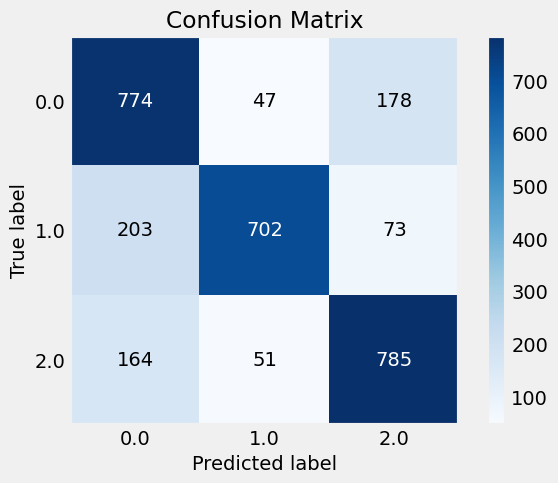

Classification report:

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       999
         1.0       0.88      0.72      0.79       978
         2.0       0.76      0.79      0.77      1000

    accuracy                           0.76      2977
   macro avg       0.77      0.76      0.76      2977
weighted avg       0.77      0.76      0.76      2977

**************************************************************************


In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.13151335716247559
Prediction time (sec) = 0.00044345855712890625

Training score = 0.7615262010476735
Testing score = 0.7615262010476735

No of misclassified for class 0 (test data) = 327
No of misclassified for class 1 (test data) = 182
No of misclassified for class 2 (test data) = 202
Total no of misclassified points (test data) = 711
Total % of misclassified points (test data) = 0.23883103795767552

Confusion matrix:


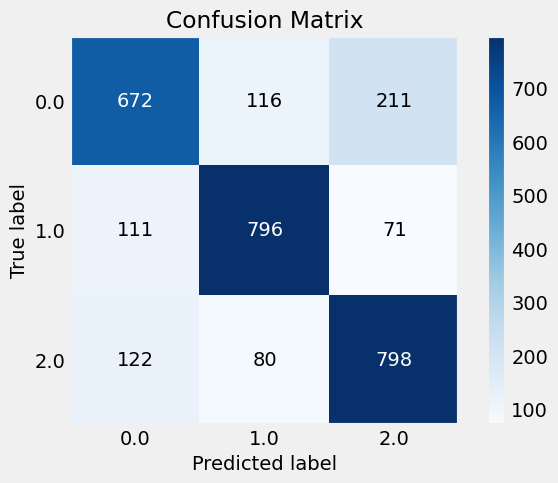

Classification report:

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.71       999
         1.0       0.80      0.81      0.81       978
         2.0       0.74      0.80      0.77      1000

    accuracy                           0.76      2977
   macro avg       0.76      0.76      0.76      2977
weighted avg       0.76      0.76      0.76      2977

**************************************************************************


In [86]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.011834859848022461
Prediction time (sec) = 0.0005924701690673828

Training score = 0.999332999666333
Testing score = 0.999332999666333

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 0
No of misclassified for class 2 (test data) = 1
Total no of misclassified points (test data) = 2
Total % of misclassified points (test data) = 0.0006718172657037286

Training log_loss = 0.000931374473976699
Testing log_loss = 0.000931374473976699

Confusion matrix:


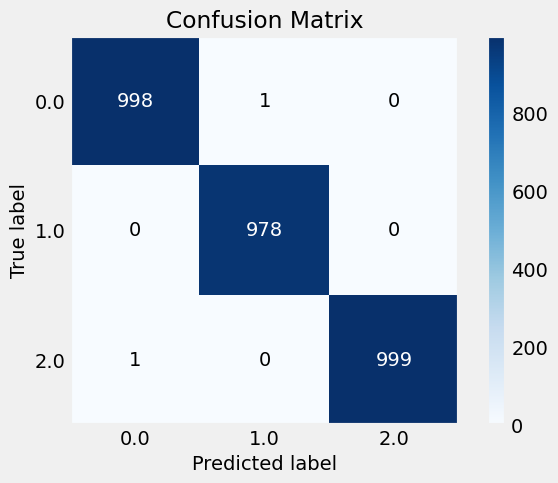

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       1.00      1.00      1.00       978
         2.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2977
   macro avg       1.00      1.00      1.00      2977
weighted avg       1.00      1.00      1.00      2977

**************************************************************************


In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.25293540954589844
Prediction time (sec) = 0.043890953063964844

Training score = 0.999332999666333
Testing score = 0.999332999666333

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 0
No of misclassified for class 2 (test data) = 1
Total no of misclassified points (test data) = 2
Total % of misclassified points (test data) = 0.0006718172657037286

Training log_loss = 0.0010843816016620315
Testing log_loss = 0.0010843816016620315

Confusion matrix:


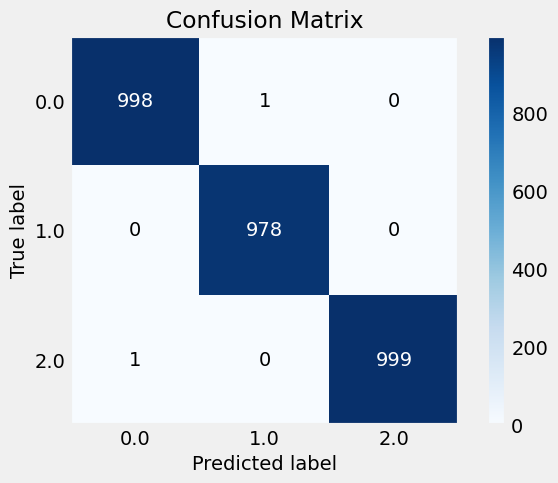

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       1.00      1.00      1.00       978
         2.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2977
   macro avg       1.00      1.00      1.00      2977
weighted avg       1.00      1.00      1.00      2977

**************************************************************************


In [88]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.3299739360809326
Prediction time (sec) = 0.029395103454589844

Training score = 0.999332999666333
Testing score = 0.999332999666333

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 0
No of misclassified for class 2 (test data) = 1
Total no of misclassified points (test data) = 2
Total % of misclassified points (test data) = 0.0006718172657037286

Training log_loss = 0.026802082019757836
Testing log_loss = 0.026802082019757836

Confusion matrix:


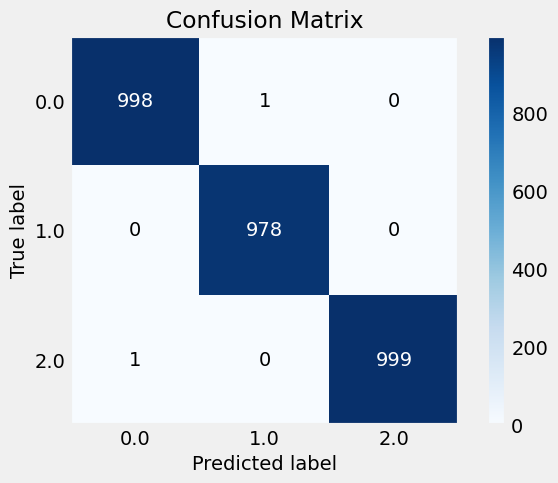

Classification report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       1.00      1.00      1.00       978
         2.0       1.00      1.00      1.00      1000

    accuracy                           1.00      2977
   macro avg       1.00      1.00      1.00      2977
weighted avg       1.00      1.00      1.00      2977

**************************************************************************


In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [90]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.759189,0.759189,716,0.240511,0.627788,0.627788,1.758244,0.000766
1,LSVC,0.761526,0.761526,711,0.238831,NaN,NaN,0.131513,0.000443
2,DTC,0.999333,0.999333,2,0.000672,0.000931,0.000931,0.011835,0.000592
3,ETC,0.999333,0.999333,2,0.000672,0.001084,0.001084,0.252935,0.043891
4,RFC,0.999333,0.999333,2,0.000672,0.026802,0.026802,0.329974,0.029395


In [91]:
scaler

StandardScaler()

In [92]:
rfc

RandomForestClassifier(class_weight='balanced')

In [93]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, rfc)
joblib.dump(pipeline, 'rfc_pipeline.joblib')

['rfc_pipeline.joblib']

In [94]:
X

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,3.0,0.0,18682,54230,30.0,1,53
1,0.000000,3.0,0.0,18682,58314,30.0,1,54
2,0.000000,3.0,0.0,18682,54823,30.0,1,54
3,0.000291,3.0,2.0,22012,53,1.0,2,54
4,0.000321,3.0,2.0,22012,53,1.0,2,54
...,...,...,...,...,...,...,...,...
2995,3.619168,2.0,0.0,14812,80,56.0,8,29
2996,268.866241,2.0,0.0,7010,80,28.0,11,29
2997,8.358563,2.0,0.0,63719,25,59.0,3,29
2998,3.609848,2.0,0.0,32912,80,56.0,9,29


In [95]:
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
2995,2
2996,2
2997,2
2998,2


In [ ]:
np.save('synthetic_X.npy', X)
np.save('synthetic_y.npy', y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!rm -rf /content/drive/MyDrive/save_data && mkdir -p /content/drive/MyDrive/save_data
!mv /content/synthetic_X.npy /content/drive/MyDrive/save_data/.
!mv /content/synthetic_y.npy /content/drive/MyDrive/save_data/.